<a href="https://colab.research.google.com/github/VakhromeevaKate/sechenov-ai-methods-course/blob/main/LossFunctions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Функции потерь

### **1. Что такое функция потерь?**
  
*  **Определение:** Математическая функция, которая количественно оценивает ошибку для одного примера (Loss) или для всей выборки (Cost). Чем меньше значение функции, тем лучше модель предсказывает.

*   **Аналогия:** "Стрельба по мишени". Функция потерь (Loss Function) — это мера того, насколько сильно наш "выстрел" (предсказание модели) промахнулся относительно центра мишени (истинное значение).

*   **Роль в процессе обучения:**
    *   **Цель обучения** — найти такие параметры (веса) модели, которые **минимизируют** функцию потерь на обучающих данных.

*   **Ключевые термины:**
    *   `y_i` — истинное значение (ground truth).
    *   `ŷ_i` — предсказанное значение (prediction).
    *   `L(y_i, ŷ_i)` — функция потерь для одного примера.
    * `J(θ) = (1/m) * Σ L(y_i, ŷ_i)` — функция стоимости (усредненная ошибка по всем `m` примерам).

### **2. Основные типы функций потерь (40 мин)**

#### **2.1. Для задач регрессии**

*   **Mean Squared Error (MSE) / L2-потеря**
    *   **Формула:** `MSE = (1/m) * Σ (y_i - ŷ_i)²`
    *   **Свойства:**
        *   Сильно штрафует за большие ошибки (из-за квадрата).
        *   Чувствительна к выбросам.
    *   **Когда использовать:** Когда нам важны большие ошибки и данные относительно "чистые".

    *   **Пример на Python:**
    ```python
    import numpy as np
    import matplotlib.pyplot as plt

    def mse_loss(y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    # Пример данных
    y_true = np.array([3, -0.5, 2, 7])
    y_pred = np.array([2.5, 0.0, 2, 8])
    print(f"MSE: {mse_loss(y_true, y_pred):.4f}") # Вывод: MSE: 0.3750
    ```

*   **Mean Absolute Error (MAE) / L1-потеря**
    *   **Формула:** `MAE = (1/m) * Σ |y_i - ŷ_i|`
    *   **Свойства:**
        *   Штрафует линейно, менее чувствительна к выбросам, чем MSE.
        *   Более стабильные градиенты для больших ошибок.
    *   **Когда использовать:** Когда в данных есть выбросы, и мы не хотим, чтобы они сильно влияли на модель.

    *   **Пример на Python:**
    ```python
    def mae_loss(y_true, y_pred):
        return np.mean(np.abs(y_true - y_pred))

    print(f"MAE: {mae_loss(y_true, y_pred):.4f}") # Вывод: MAE: 0.5000
    ```

*   **Huber Loss**
    *   **Формула:** Комбинация MSE и MAE. Квадратичная для малых ошибок, линейная для больших.
    *   **Свойства:** "Лучшее из двух миров" — дифференцируема в нуле (как MSE) и устойчива к выбросам (как MAE).
    *   **Когда использовать:** Когда хотим сгладить переход между чувствительностью к выбросам и стабильностью.

    *   **Пример на Python (используя готовую функцию):**
    ```python
    from sklearn.metrics import mean_squared_error, mean_absolute_error
    from sklearn.linear_model import HuberRegressor

    # HuberRegressor использует Huber Loss внутри себя
    # Для прямого расчета:
    def huber_loss(y_true, y_pred, delta=1.0):
        error = y_true - y_pred
        is_small_error = np.abs(error) <= delta
        squared_loss = 0.5 * error ** 2
        linear_loss = delta * (np.abs(error) - 0.5 * delta)
        return np.mean(np.where(is_small_error, squared_loss, linear_loss))

    print(f"Huber Loss: {huber_loss(y_true, y_pred):.4f}")
    ```

#### **2.2. Для задач классификации**

*   **Binary Cross-Entropy (Log Loss)**
    *   **Формула:** `L = - [y_i * log(ŷ_i) + (1 - y_i) * log(1 - ŷ_i)]`
    *   **Интуиция:** Сравнивает распределение вероятностей предсказания с истинным "распределением" (0 или 1). Сильно штрафует за уверенные, но неправильные предсказания.
    *   **Когда использовать:** Для бинарной классификации, когда на выходе модели — вероятность (например, сигмоида).

    *   **Пример на Python:**
    ```python
    def binary_crossentropy_loss(y_true, y_pred):
        # Добавляем эпсилон, чтобы избежать log(0)
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    # y_true - бинарные метки (0 или 1)
    y_true_bin = np.array([0, 1, 1, 0])
    # y_pred - вероятности принадлежности к классу 1
    y_pred_bin = np.array([0.1, 0.9, 0.8, 0.3])
    print(f"Binary Cross-Entropy: {binary_crossentropy_loss(y_true_bin, y_pred_bin):.4f}")
    ```

*   **Categorical Cross-Entropy**
    *   **Формула:** `L = - Σ y_i,c * log(ŷ_i,c)` (суммирование по классам `c`).
    *   **Когда использовать:** Для многоклассовой классификации, когда на выходе модели — распределение вероятностей по классам (например, softmax).

*   **Hinge Loss**
    *   **Формула:** `L = max(0, 1 - y_i * ŷ_i)`, где `y_i` = {-1, +1}.
    *   **Когда использовать:** В основном, для обучения методов с **максимальным зазором**, таких как SVM (Support Vector Machines). Стремится не только к правильной классификации, но и к увеличению "зазора" между классами.

---

### **3. Как функция потерь влияет на результат обучения? (15 мин)**

*   **Определяет "цель" модели:**
    *   MSE заставит модель бояться больших ошибок и усреднять выбросы.
    *   MAE позволит модели проигнорировать некоторые выбросы.
    *   Cross-Entropy напрямую оптимизирует вероятность правильной классификации.

*   **Влияние на градиент:**
    *   **MSE:** Градиент пропорционален ошибке `2*(y_pred - y_true)`. При больших ошибках градиент огромный, что может быть проблемой.
    *   **MAE:** Градиент постоянный (`±1`), что может привести к медленной сходимости на малых ошибках.
    *   **Huber Loss:** Плавно переходит от поведения MSE (для малых ошибок) к поведению MAE (для больших).

*   **Визуализация:**
    *   Показать графики функций потерь и их производных (градиентов) для `y_true=0`.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression, make_classification
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import accuracy_score
import tensorflow as tf

# 1. Функции потерь для регрессии
print("1. ФУНКЦИИ ПОТЕРЬ ДЛЯ РЕГРЕССИИ")

def mse_loss(y_true, y_pred):
    """Mean Squared Error (MSE)"""
    return np.mean((y_true - y_pred) ** 2)

def mae_loss(y_true, y_pred):
    """Mean Absolute Error (MAE)"""
    return np.mean(np.abs(y_true - y_pred))

def huber_loss(y_true, y_pred, delta=1.0):
    """Huber Loss - комбинация MSE и MAE"""
    error = y_true - y_pred
    is_small_error = np.abs(error) <= delta
    squared_loss = 0.5 * error ** 2
    linear_loss = delta * (np.abs(error) - 0.5 * delta)
    return np.mean(np.where(is_small_error, squared_loss, linear_loss))

# Создаем данные с выбросами
np.random.seed(42)
X_reg = np.linspace(0, 10, 100)
y_true_reg = 2 * X_reg + 1 + np.random.normal(0, 1, 100)

# Добавляем выбросы
y_true_reg[90:] += 15  # Сильные выбросы в конце

# Простая линейная модель
y_pred_reg = 2.1 * X_reg + 0.9  # Примерные предсказания

# Считаем потери
mse = mse_loss(y_true_reg, y_pred_reg)
mae = mae_loss(y_true_reg, y_pred_reg)
huber = huber_loss(y_true_reg, y_pred_reg)

print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"Huber Loss: {huber:.4f}")
print("→ MSE сильно штрафует за выбросы, MAE более устойчива\n")

1. ФУНКЦИИ ПОТЕРЬ ДЛЯ РЕГРЕССИИ
MSE: 20.6207
MAE: 2.1504
Huber Loss: 1.7594
→ MSE сильно штрафует за выбросы, MAE более устойчива



**Бинарная кросс-энтропия** измеряет разницу между предсказанной вероятностью и фактическим значением (0 или 1) в задачах бинарной классификации, вычисляя штраф за ошибки модели, и уменьшается при улучшении предсказаний.

Её формула: - (y * log(p) + (1 - y) * log(1 - p)), где
  y — истинное значение класса, а
  p — предсказанная моделью вероятность принадлежности к классу 1.

**Как это работает:**
Цель бинарной классификации — классифицировать объект как принадлежащий одному из двух классов, например, спам/не спам, или болезнь/нет болезни.

Предсказанная вероятность (p):
Модель прогнозирует вероятность того, что объект принадлежит к классу 1. Это число всегда находится в диапазоне от 0 до 1.

Фактическое значение (y): Это истинный класс объекта, который равен 0 или 1.

Когда y равно 1 (объект на самом деле из класса 1), формула упрощается до -log(p), потому что (1 - y) будет 0. Если p близко к 1 (модель предсказала верно), логарифм будет близок к 0, и штраф будет низким. Если p близко к 0 (модель предсказала неверно), логарифм будет большим, и штраф будет высоким.

Когда y равно 0 (объект на самом деле из класса 0): Формула упрощается до -log(1 - p). Если p близко к 0 (что означает, что 1 - p близко к 1, и модель предсказала верно), логарифм будет близок к 0. Если p близко к 1 (что означает, что 1 - p близко к 0, и модель предсказала неверно), логарифм будет большим, и штраф будет высоким.

Штраф за ошибки: Функция потерь (кросс-энтропия) вычисляет штраф за то, насколько предсказанные вероятности отклоняются от фактических значений, и чем ближе предсказание, тем меньше потеря. Цель обучения — минимизировать это значение потерь, тем самым улучшая точность модели.

In [ ]:
# 2. Функции потерь для классификации
print("2. ФУНКЦИИ ПОТЕРЬ ДЛЯ КЛАССИФИКАЦИИ")

def binary_crossentropy_loss(y_true, y_pred, epsilon=1e-15):
    """Binary Cross-Entropy Loss"""
    # Защита от log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def hinge_loss(y_true, y_pred):
    """Hinge Loss (для SVM)"""
    # Для hinge loss метки должны быть -1 или +1
    y_true_hinge = 2 * y_true - 1  # преобразуем 0,1 в -1,+1
    return np.mean(np.maximum(0, 1 - y_true_hinge * y_pred))

# Данные для бинарной классификации
y_true_bin = np.array([0, 1, 1, 0, 1, 0, 1, 1])
# Предсказанные вероятности (некоторые уверенные, некоторые нет)
y_pred_bin_good = np.array([0.1, 0.9, 0.8, 0.2, 0.85, 0.3, 0.95, 0.88])
y_pred_bin_bad = np.array([0.9, 0.1, 0.3, 0.8, 0.2, 0.7, 0.4, 0.15])  # Плохие предсказания

bce_good = binary_crossentropy_loss(y_true_bin, y_pred_bin_good)
bce_bad = binary_crossentropy_loss(y_true_bin, y_pred_bin_bad)
hinge_good = hinge_loss(y_true_bin, y_pred_bin_good)
hinge_bad = hinge_loss(y_true_bin, y_pred_bin_bad)

print("Хорошие предсказания:")
print(f"  Binary Cross-Entropy: {bce_good:.4f}")
print(f"  Hinge Loss: {hinge_good:.4f}")

print("\nПлохие предсказания (уверенные, но неправильные):")
print(f"  Binary Cross-Entropy: {bce_bad:.4f}")
print(f"  Hinge Loss: {hinge_bad:.4f}")
print("→ Cross-Entropy сильно штрафует за уверенные неправильные предсказания\n")


2. ФУНКЦИИ ПОТЕРЬ ДЛЯ КЛАССИФИКАЦИИ
Хорошие предсказания:
  Binary Cross-Entropy: 0.1694
  Hinge Loss: 0.5275

Плохие предсказания (уверенные, но неправильные):
  Binary Cross-Entropy: 1.6307
  Hinge Loss: 1.1562
→ Cross-Entropy сильно штрафует за уверенные неправильные предсказания



3. ВИЗУАЛИЗАЦИЯ ФУНКЦИЙ ПОТЕРЬ


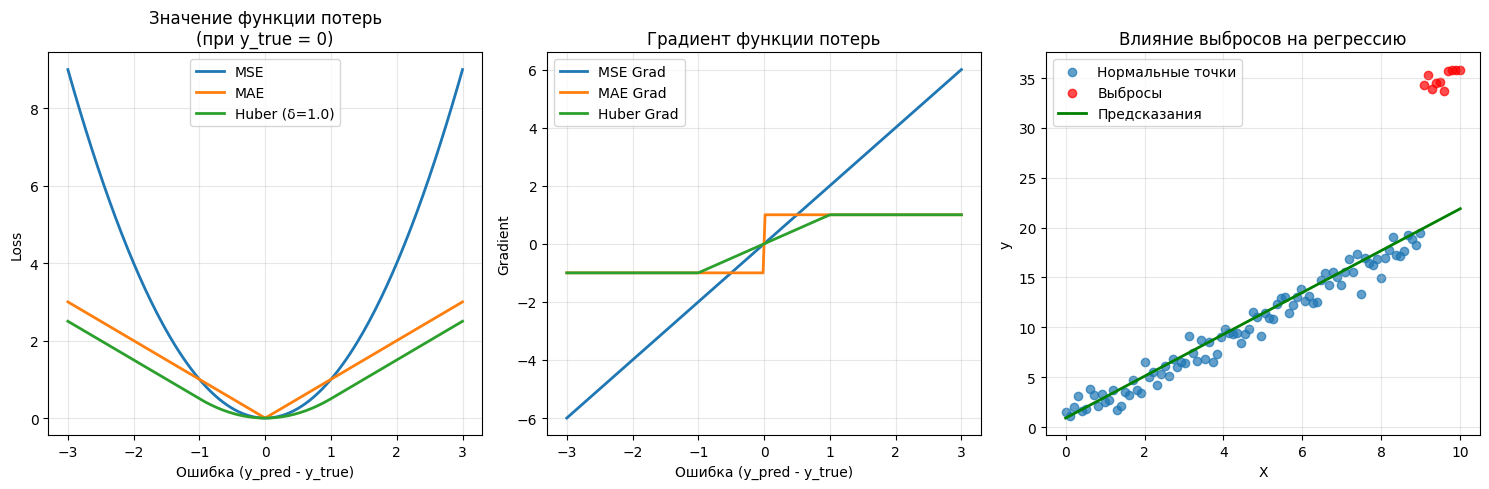

In [ ]:
print("3. ВИЗУАЛИЗАЦИЯ ФУНКЦИЙ ПОТЕРЬ")

# Создаем данные для визуализации
x_vals = np.linspace(-3, 3, 200)
y_true_zero = np.zeros_like(x_vals)

# ПРАВИЛЬНЫЙ расчет значений потерь для каждого x
mse_vals = np.array([mse_loss(0, x) for x in x_vals])
mae_vals = np.array([mae_loss(0, x) for x in x_vals])
huber_vals = np.array([huber_loss(0, x, delta=1.0) for x in x_vals])

# Градиенты
mse_grad = 2 * x_vals
mae_grad = np.sign(x_vals)
huber_grad = np.where(np.abs(x_vals) <= 1.0, x_vals, 1.0 * np.sign(x_vals))

# Построение графиков
plt.figure(figsize=(15, 5))

# График 1: Значения функций потерь
plt.subplot(1, 3, 1)
plt.plot(x_vals, mse_vals, label='MSE', linewidth=2)
plt.plot(x_vals, mae_vals, label='MAE', linewidth=2)
plt.plot(x_vals, huber_vals, label='Huber (δ=1.0)', linewidth=2)
plt.title('Значение функции потерь\n(при y_true = 0)')
plt.xlabel('Ошибка (y_pred - y_true)')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

# График 2: Градиенты функций потерь
plt.subplot(1, 3, 2)
plt.plot(x_vals, mse_grad, label='MSE Grad', linewidth=2)
plt.plot(x_vals, mae_grad, label='MAE Grad', linewidth=2)
plt.plot(x_vals, huber_grad, label='Huber Grad', linewidth=2)
plt.title('Градиент функции потерь')
plt.xlabel('Ошибка (y_pred - y_true)')
plt.ylabel('Gradient')
plt.legend()
plt.grid(True, alpha=0.3)

# График 3: Влияние выбросов на регрессию
plt.subplot(1, 3, 3)
plt.scatter(X_reg[:-10], y_true_reg[:-10], alpha=0.7, label='Нормальные точки')
plt.scatter(X_reg[-10:], y_true_reg[-10:], color='red', alpha=0.7, label='Выбросы')
plt.plot(X_reg, y_pred_reg, 'g-', linewidth=2, label='Предсказания')
plt.title('Влияние выбросов на регрессию')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
# 4. Практический пример с TensorFlow/Keras
print("4. ПРАКТИЧЕСКИЙ ПРИМЕР С НЕЙРОННОЙ СЕТЬЮ")

# Берем простой синтетический датасет для классификации из sklearn.datasets
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2,
                          n_informative=15, random_state=42)

# Разделяем его на train/test выборки
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print(f"Размеры данных: X_train {X_train.shape}, y_train {y_train.shape}")

# Создаем простую нейронную сеть
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(20,)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')  # sigmoid для бинарной классификации
])

# Компилируем модель с binary_crossentropy
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Правильный выбор для бинарной классификации
    metrics=['accuracy']
)

print("\nОбучение модели с Binary Cross-Entropy...")
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=0  # Убираем вывод эпох для краткости
)

# Оценка модели
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Результаты на тестовых данных:")
print(f"  Loss (Binary Cross-Entropy): {test_loss:.4f}")
print(f"  Accuracy: {test_accuracy:.4f}")

4. ПРАКТИЧЕСКИЙ ПРИМЕР С НЕЙРОННОЙ СЕТЬЮ
Размеры данных: X_train (800, 20), y_train (800,)

Обучение модели с Binary Cross-Entropy...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Результаты на тестовых данных:
  Loss (Binary Cross-Entropy): 0.1265
  Accuracy: 0.9450


### **4. Распространенные ошибки и как их избежать**

1.  **Выбор без учета типа задачи.**
    *   **Ошибка:** Использовать MSE для задачи бинарной классификации.
    *   **Решение:** Всегда спрашивать: "Какую задачу я решаю? (Регрессия/Классификация)". Регрессия -> MSE, MAE, Huber. Классификация -> Cross-Entropy, Hinge.

2.  **Несовместимость активации и функции потерь.**
    *   **Ошибка:** Использовать несовместимую с функцией потерь функцию активации.
    *   **Решение:** Запомнить пары:
        *   `sigmoid` + `binary_crossentropy`
        *   `softmax` + `categorical_crossentropy`
        *   `linear` (нет активации) + `MSE/MAE`

3.  **Игнорирование выбросов в данных.**
    *   **Ошибка:** Использовать MSE на данных с сильными выбросами. Модель будет подстраиваться под них в ущерб основной массе данных.
    *   **Решение:** Почистить данные, либо взять MAE или Huber Loss.

4.  **Проблема "логарифма нуля".**
    *   **Ошибка:** При расчете Cross-Entropy, если `ŷ_i = 0`, а `y_i = 1`, то `log(0)` приведет к `-inf` и ошибкам.
    *   **Решение:** Всегда добавлять маленькое эпсилон-сглаживание: `ŷ_i = np.clip(ŷ_i, epsilon, 1 - epsilon)`.

5.  **Отслеживание не той метрики.**
    *   **Ошибка:** Следить за значением Loss во время валидации, хотя бизнес-метрика — это, например, `accuracy` или `f1-score`.
    *   **Решение:** Loss — для *обучения* (она должна быть дифференцируемой), а для *оценки* и *принятия решений* стоит использовать интерпретируемые метрики (Accuracy, Precision, Recall, f1 и т.д.).

In [ ]:
# 5. Демонстрация частых ошибок
print("\n5. ЧАСТЫЕ ОШИБКИ И ИХ РЕШЕНИЯ")

print("\nОшибка: Расчет Cross-Entropy без защиты от log(0)")
y_true_test = np.array([1, 0, 1])
y_pred_risky = np.array([0.0, 1.0, 0.999999])  # Риск log(0)

try:
    # Это вызовет ошибку или -inf
    dangerous_loss = -np.mean(y_true_test * np.log(y_pred_risky) +
                             (1 - y_true_test) * np.log(1 - y_pred_risky))
    print(f"Опасный расчет: {dangerous_loss}")
except Exception as e:
    print(f"Ошибка при опасном расчете: {e}")

# Правильный способ с защитой
safe_loss = binary_crossentropy_loss(y_true_test, y_pred_risky)
print(f"Безопасный расчет: {safe_loss:.4f}")

print("\nОшибка: Несовместимость активации и функции потерь")
print("Неправильно: softmax + binary_crossentropy")
print("Правильно: sigmoid + binary_crossentropy (бинарная классификация)")
print("Правильно: softmax + categorical_crossentropy (многоклассовая)")

# Сравнение MSE и MAE на данных с выбросами
print("\nСравнение устойчивости к выбросам:")
clean_data_loss = mse_loss(np.array([1, 2, 3]), np.array([1.1, 1.9, 3.1]))
outlier_data_loss = mse_loss(np.array([1, 2, 10]), np.array([1.1, 1.9, 3.1]))  # Выброс 10

print(f"MSE на чистых данных: {clean_data_loss:.4f}")
print(f"MSE на данных с выбросом: {outlier_data_loss:.4f}")
print("→ MSE сильно возрастает при наличии выбросов")


5. ЧАСТЫЕ ОШИБКИ И ИХ РЕШЕНИЯ

Ошибка: Расчет Cross-Entropy без защиты от log(0)
Опасный расчет: inf
Безопасный расчет: 23.0261

Ошибка: Несовместимость активации и функции потерь
Неправильно: softmax + binary_crossentropy
Правильно: sigmoid + binary_crossentropy (бинарная классификация)
Правильно: softmax + categorical_crossentropy (многоклассовая)

Сравнение устойчивости к выбросам:
MSE на чистых данных: 0.0100
MSE на данных с выбросом: 15.8767
→ MSE сильно возрастает при наличии выбросов


/tmp/ipython-input-199217554.py:10: RuntimeWarning: divide by zero encountered in log
  dangerous_loss = -np.mean(y_true_test * np.log(y_pred_risky) +
/tmp/ipython-input-199217554.py:11: RuntimeWarning: divide by zero encountered in log
  (1 - y_true_test) * np.log(1 - y_pred_risky))


### **5. Заключение и резюме**

*   Функция потерь — это сердце процесса обучения ML-модели. Она определяет, что значит "хорошее" предсказание.
*   Нет "универсальной" функции потерь. Выбор зависит от задачи, данных и требуемого поведения модели.
*   Начинать стоит с стандартных для задачи (MSE для регрессии, Cross-Entropy для классификации), а затем экспериментировать, если есть специфические требования (выбросы, несбалансированность классов).